In [146]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
trans_MM = MinMaxScaler()
le = LabelEncoder()

In [147]:
dataset = pd.read_excel('1688640705_hr_comma_sep.xlsx')
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [148]:
#step1: check if we have a missing values. As we see, we don't have any missing values (all of the data are non-null).
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [149]:
#Step: We need to make all the data numeric(sales and salary columns) in order to darw a heatmap of the Correlation Matrix.
df = pd.get_dummies(dataset, columns= ['sales'])

df['salary_e'] = le.fit_transform(dataset['salary'])
df = df.drop(['salary'], axis=1)

df_MM = trans_MM.fit_transform(df)
df_MM = pd.DataFrame(df_MM, columns=df.columns)


In [150]:
corr = df_MM.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_e
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,-0.028649,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,0.002193,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,0.004189,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,0.000524,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,0.003909,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,-0.012836,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,0.015201,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,-0.004852,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,-0.001318
sales_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,-0.069293,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,0.010058
sales_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,-0.054629,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,0.022783


(array([1335.,  498.,  477., 1778., 1471., 1775., 1768., 2115., 1998.,
        1784.]),
 array([0.09 , 0.181, 0.272, 0.363, 0.454, 0.545, 0.636, 0.727, 0.818,
        0.909, 1.   ]),
 <BarContainer object of 10 artists>)

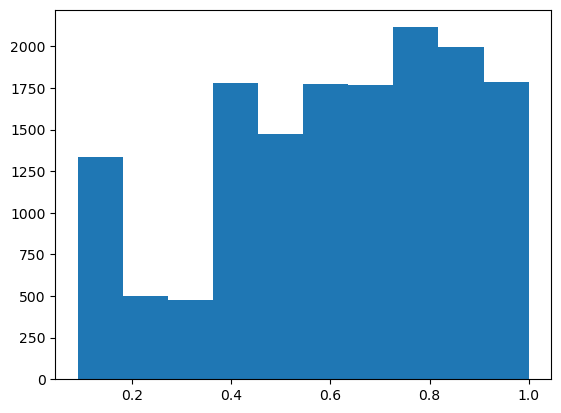

In [151]:
import matplotlib.pyplot as plt
plt.hist(df['satisfaction_level'])

(array([ 351.,  885., 2371., 1590., 1372., 1518., 1423., 1970., 1669.,
        1850.]),
 array([0.36 , 0.424, 0.488, 0.552, 0.616, 0.68 , 0.744, 0.808, 0.872,
        0.936, 1.   ]),
 <BarContainer object of 10 artists>)

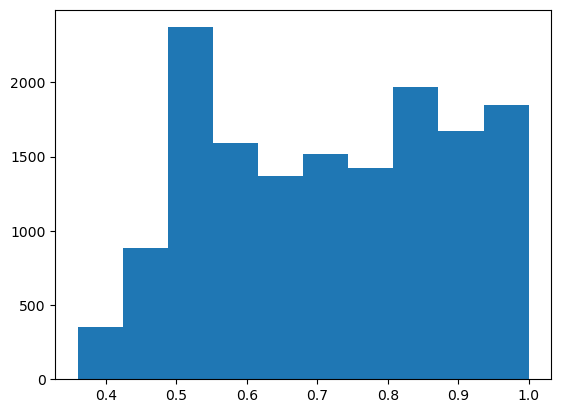

In [152]:
plt.hist(df['last_evaluation'])

(array([ 367., 1240., 2733., 1722., 1628., 1712., 1906., 2240., 1127.,
         324.]),
 array([ 96. , 117.4, 138.8, 160.2, 181.6, 203. , 224.4, 245.8, 267.2,
        288.6, 310. ]),
 <BarContainer object of 10 artists>)

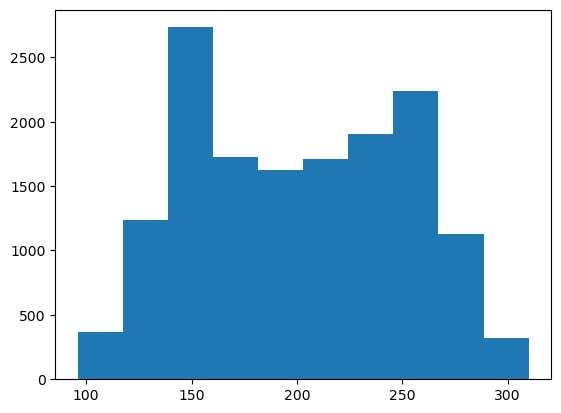

In [153]:
plt.hist(df['average_montly_hours'])

<BarContainer object of 14999 artists>

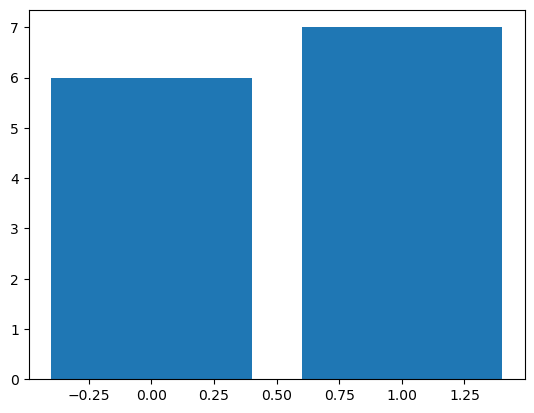

In [154]:
#2.3.	Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization :
plt.bar(x=df['left'], height=df['number_project'])

__Observation:__

- There are positive relationship between employees who saty and number of projects.


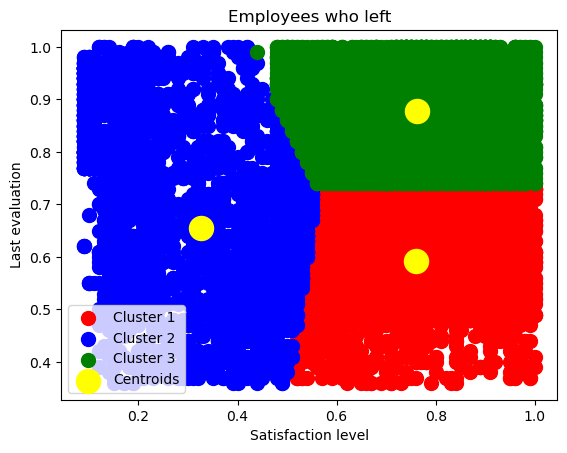

In [155]:
#3.	Perform clustering of employees who left based on their satisfaction and evaluation:
X = df.iloc[:, [0, 1]].values
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Satisfaction level')
plt.ylabel('Last evaluation')
plt.title('Employees who left')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [156]:
#4.	Handle the left Class Imbalance using the SMOTE technique:
dataset['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

We can see there is an unbalanced data, so we can use SMOTE() technique.
- Separating categorical variables and numeric variables.

In [157]:
X = dataset.drop(['left', 'sales','salary'], axis=1)
y = dataset['left'] #The data that we need to be balanced.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_X, transformed_y = oversample.fit_resample(X,y)
transformed_y.value_counts()

left
1    11428
0    11428
Name: count, dtype: int64

In [158]:
transformed_X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.380000,0.530000,2,157,3,0,0
1,0.800000,0.860000,5,262,6,0,0
2,0.110000,0.880000,7,272,4,0,0
3,0.720000,0.870000,5,223,5,0,0
4,0.370000,0.520000,2,159,3,0,0
...,...,...,...,...,...,...,...
22851,0.420000,0.553968,2,146,3,0,0
22852,0.730000,0.990000,5,262,5,0,0
22853,0.780000,1.000000,4,253,5,0,0
22854,0.880000,0.990000,5,262,6,0,0


In [159]:
dataset_transformed = transformed_X
dataset_transformed['y'] = transformed_y
dataset_transformed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,y
0,0.380000,0.530000,2,157,3,0,0,1
1,0.800000,0.860000,5,262,6,0,0,1
2,0.110000,0.880000,7,272,4,0,0,1
3,0.720000,0.870000,5,223,5,0,0,1
4,0.370000,0.520000,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
22851,0.420000,0.553968,2,146,3,0,0,1
22852,0.730000,0.990000,5,262,5,0,0,1
22853,0.780000,1.000000,4,253,5,0,0,1
22854,0.880000,0.990000,5,262,6,0,0,1


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(transformed_X, transformed_y, random_state=123, test_size=0.20)

In [161]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,y
12263,0.110000,0.780000,6,260,4,0,0,1
16998,0.889100,0.954033,5,240,5,0,0,1
8874,0.590000,0.990000,5,254,3,1,0,0
16777,0.430000,0.552923,2,129,3,0,0,1
10044,0.980000,0.500000,3,251,3,0,0,0
...,...,...,...,...,...,...,...,...
15377,0.100000,0.907920,6,280,4,0,0,1
21602,0.379631,0.570000,2,158,3,0,0,1
17730,0.108797,0.783609,6,245,4,0,0,1
15725,0.409357,0.539357,2,152,3,0,0,1


5.1.	Train a Logistic Regression model, and plot the classification report

In [162]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2309
           1       1.00      1.00      1.00      2263

    accuracy                           1.00      4572
   macro avg       1.00      1.00      1.00      4572
weighted avg       1.00      1.00      1.00      4572



In [163]:
#The confusion matrix for each of the model:

confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat


array([[2309,    0],
       [   0, 2263]], dtype=int64)

5.2.	Train a Random Forest Classifier model, and plot the classification report

In [164]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [165]:
from sklearn import metrics
import numpy as np

print('Train MAE:', metrics.mean_absolute_error(y_train, regressor.predict(X_train)))
print('R Square:', metrics.mean_squared_error(y_train, regressor.predict(X_train)))
print('Train RMSE:', np.sqrt(y_train, regressor.predict(X_train)))

Train MAE: 0.0
R Square: 0.0
Train RMSE: 12263    1.0
16998    1.0
8874     0.0
16777    1.0
10044    0.0
        ... 
15377    1.0
21602    1.0
17730    1.0
15725    1.0
19966    1.0
Name: left, Length: 18284, dtype: float64


In [166]:
print('Train MAE:', metrics.mean_absolute_error(y_test, regressor.predict(X_test)))
print('R Square:', metrics.mean_squared_error(y_test, regressor.predict(X_test)))
print('Train RMSE:', np.sqrt(y_test, regressor.predict(X_test)))

Train MAE: 0.0
R Square: 0.0
Train RMSE: 1370     1.0
21489    1.0
12599    1.0
20434    1.0
13031    0.0
        ... 
1392     1.0
8229     0.0
18930    1.0
8389     0.0
14269    1.0
Name: left, Length: 4572, dtype: float64


In [167]:
#The confusion matrix for each of the model:

confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat


array([[2309,    0],
       [   0, 2263]], dtype=int64)

5.3.	Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [169]:
from sklearn.model_selection import KFold
#n_splits: how many time I am gonna split it(5 different ways)
#shuffle=True: before I split my dataset, shuffle them
kf = KFold(n_splits=5,random_state=42,shuffle=True)
#kf.split(X): all my 5 dataset
#In the first group:The first array is my train index, The second array is my val index
for train_index,val_index in kf.split(X):
    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
    y_train,y_val = y.iloc[train_index],y.iloc[val_index],

In [170]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_val,gradient_booster.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2274
           1       0.97      0.94      0.96       725

    accuracy                           0.98      2999
   macro avg       0.98      0.97      0.97      2999
weighted avg       0.98      0.98      0.98      2999



We need to used a recall metric because it's more accurate.

In [172]:
#The confusion matrix for each of the model:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[2309,    0],
       [   0, 2263]], dtype=int64)

In [185]:
test= X_test.iloc[51].values.reshape(-1, 1).T #reshape(-1, 1):It's flips it from an array to column.
test

array([[  0.9 ,   0.82,   5.  , 259.  ,   5.  ,   0.  ,   0.  ,   1.  ]])

In [184]:
test= X_test.iloc[51].values.reshape(-1, 1).T
#predict_proba: means predict probablity. If it is > .5 then it will be 1, if it is < .5 then it will be 
proba = model.predict_proba(test)

#model.classes_: what are my classes that I am trying to predict.
classes = model.classes_

resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction

C:\Users\al1hj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
1,0.996049
0,0.003951
